In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [2]:
import numpy as np

def sample_threeclass(n, ratio=0.8):
    np.random.seed(42)
    y_0 = np.random.randint(2, size=(n, 1))
    switch = (np.random.random(size=(n, 1)) <= ratio)
    y_1 = ~y_0 & switch
    y_2 = ~y_0 & ~switch
    y = np.concatenate([y_0, y_1, y_2], axis=1)
    
    X = y_0 + (np.random.normal(size=n) / 5)[np.newaxis].T
    return (X, y)


X_train, y_train = sample_threeclass(1000)
X_test, y_test = sample_threeclass(100)

# Sigmoid

(-5.49, 5.290000000000008, -0.04256437797184291, 1.0410946577429678)

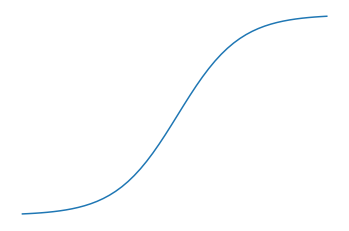

In [3]:
def logistic_func(x): return np.e**x/(np.e**x + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(-5, 5, 0.2), [logistic_func(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')

In [4]:
clf = Sequential()
clf.add(Dense(3, activation='sigmoid', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)

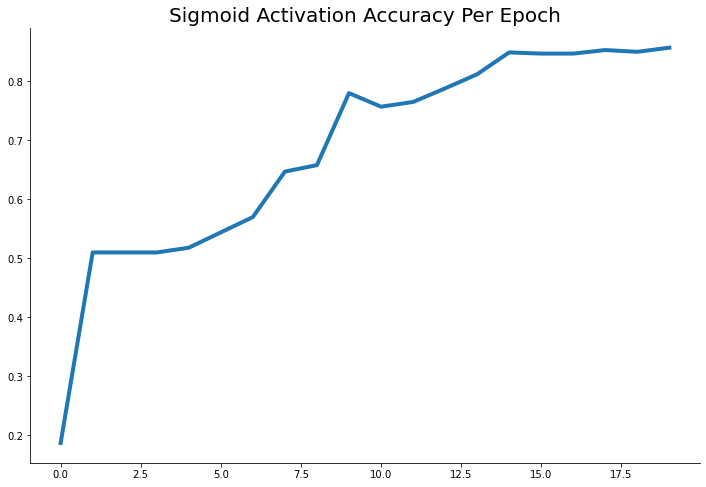

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(clf.history.history['accuracy'])), clf.history.history['accuracy'], linewidth=4)
import seaborn as sns; sns.despine()
plt.title("Sigmoid Activation Accuracy Per Epoch", fontsize=20)
pass

# Tanh

(-5.49, 5.290000000000008, -1.099897892060763, 1.0998532394989282)

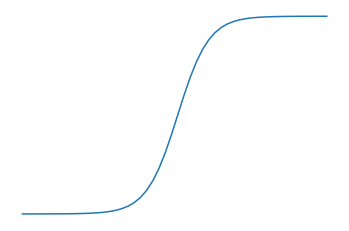

In [6]:
plt.plot(np.arange(-5, 5, 0.2), [np.tanh(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')

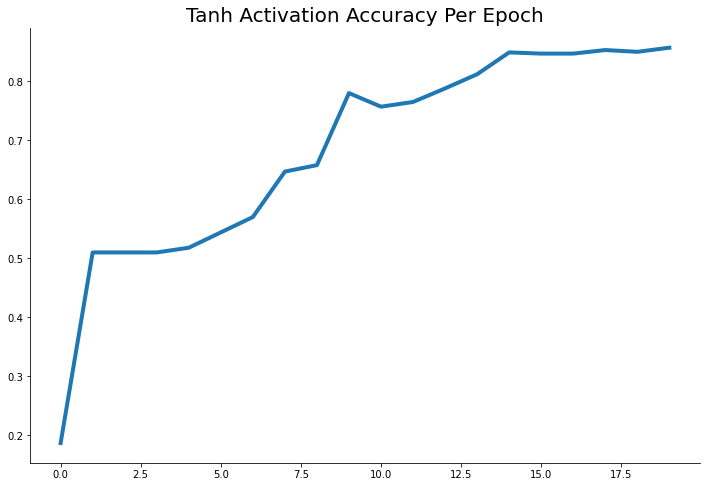

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(clf.history.history['accuracy'])), clf.history.history['accuracy'], linewidth=4)
import seaborn as sns; sns.despine()
plt.title("Tanh Activation Accuracy Per Epoch", fontsize=20)
pass

# ReLU

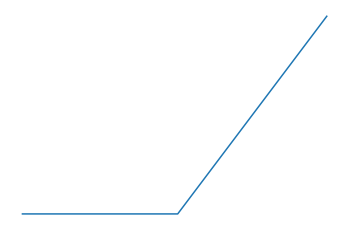

In [8]:
def relu(x):
    return 0 if x <= 0 else x

plt.plot(np.arange(-5, 5, 0.2), [relu(x) for x in np.arange(-5, 5, 0.2)])
plt.axis('off')
pass

In [9]:
clf = Sequential()
clf.add(Dense(3, activation='relu', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

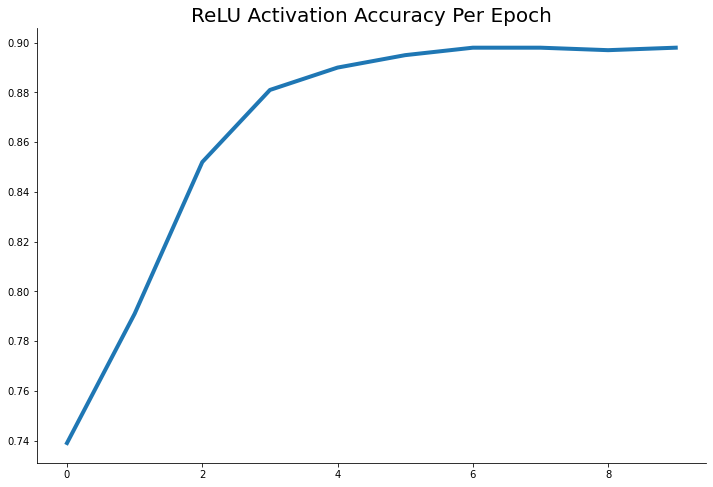

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.plot(range(len(clf.history.history['accuracy'])), clf.history.history['accuracy'], linewidth=4)
import seaborn as sns; sns.despine()
plt.title("ReLU Activation Accuracy Per Epoch", fontsize=20)
pass

# Softmax

In [11]:
clf = Sequential()
clf.add(Dense(3, activation='linear', input_shape=(1,), name='hidden'))
clf.add(Dense(3, activation='softmax', name='out'))
clf.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

clf.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
8/8 [==============================] - 1s 3ms/step - loss: 1.2780 - accuracy: 0.2010
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 1.2438 - accuracy: 0.1600
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 1.2132 - accuracy: 0.1320
Epoch 4/20
8/8 [==============================] - 0s 3ms/step - loss: 1.1855 - accuracy: 0.1080
Epoch 5/20
8/8 [==============================] - 0s 3ms/step - loss: 1.1601 - accuracy: 0.0760
Epoch 6/20
8/8 [==============================] - 0s 2ms/step - loss: 1.1369 - accuracy: 0.0550
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 1.1155 - accuracy: 0.0300
Epoch 8/20
8/8 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.0200
Epoch 9/20
8/8 [==============================] - 0s 3ms/step - loss: 1.0775 - accuracy: 0.0120
Epoch 10/20
8/8 [==============================] - 0s 2ms/step - loss: 1.0604 - accuracy: 0.0080
Epoch 11/20
8/8 [======================

In [12]:
y_test_pred = clf.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [13]:
y_test_pred[:5]

array([[0.43334162, 0.3287309 , 0.23792747],
       [0.50264645, 0.38852838, 0.10882521],
       [0.43599787, 0.33092406, 0.23307808],
       [0.4159975 , 0.3145231 , 0.26947936],
       [0.4545491 , 0.34639502, 0.19905593]], dtype=float32)

In [14]:
y_test_pred.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
y_test_pred = np.zeros(shape=y_test.shape)

for x, y in enumerate(clf.predict(X_test).argmax(axis=1)):
    y_test_pred[x][y] = 1

4/4 [==============================] - 0s 7ms/step


In [22]:
f'Achieved accuracy score of {(y_test_pred == y_test).sum().sum() / (y_test.shape[0] * y_test.shape[1])}'

'Achieved accuracy score of 0.7533333333333333'